Name: Burak Suyunu

I hereby declare that I observed the honour code of the university when preparing the homework.

## Solution to 16.3-5 and 18

### 16
Note: I couldn't attend the last week's ps (because my flights cancelled 3 times in 2 days) and so I couldn't listen the first part of this question. I took ps notes from my classmates but they also didn't understand well enough to explain to me. So I tried to solve it and I hope I didn't babble too much.

### 16.3
Value of $y_t$ stay still for a time then takes a random value. Previous $y_t$ values doesn't effect further $y_t$ values. This part resembles part 1 of this question.

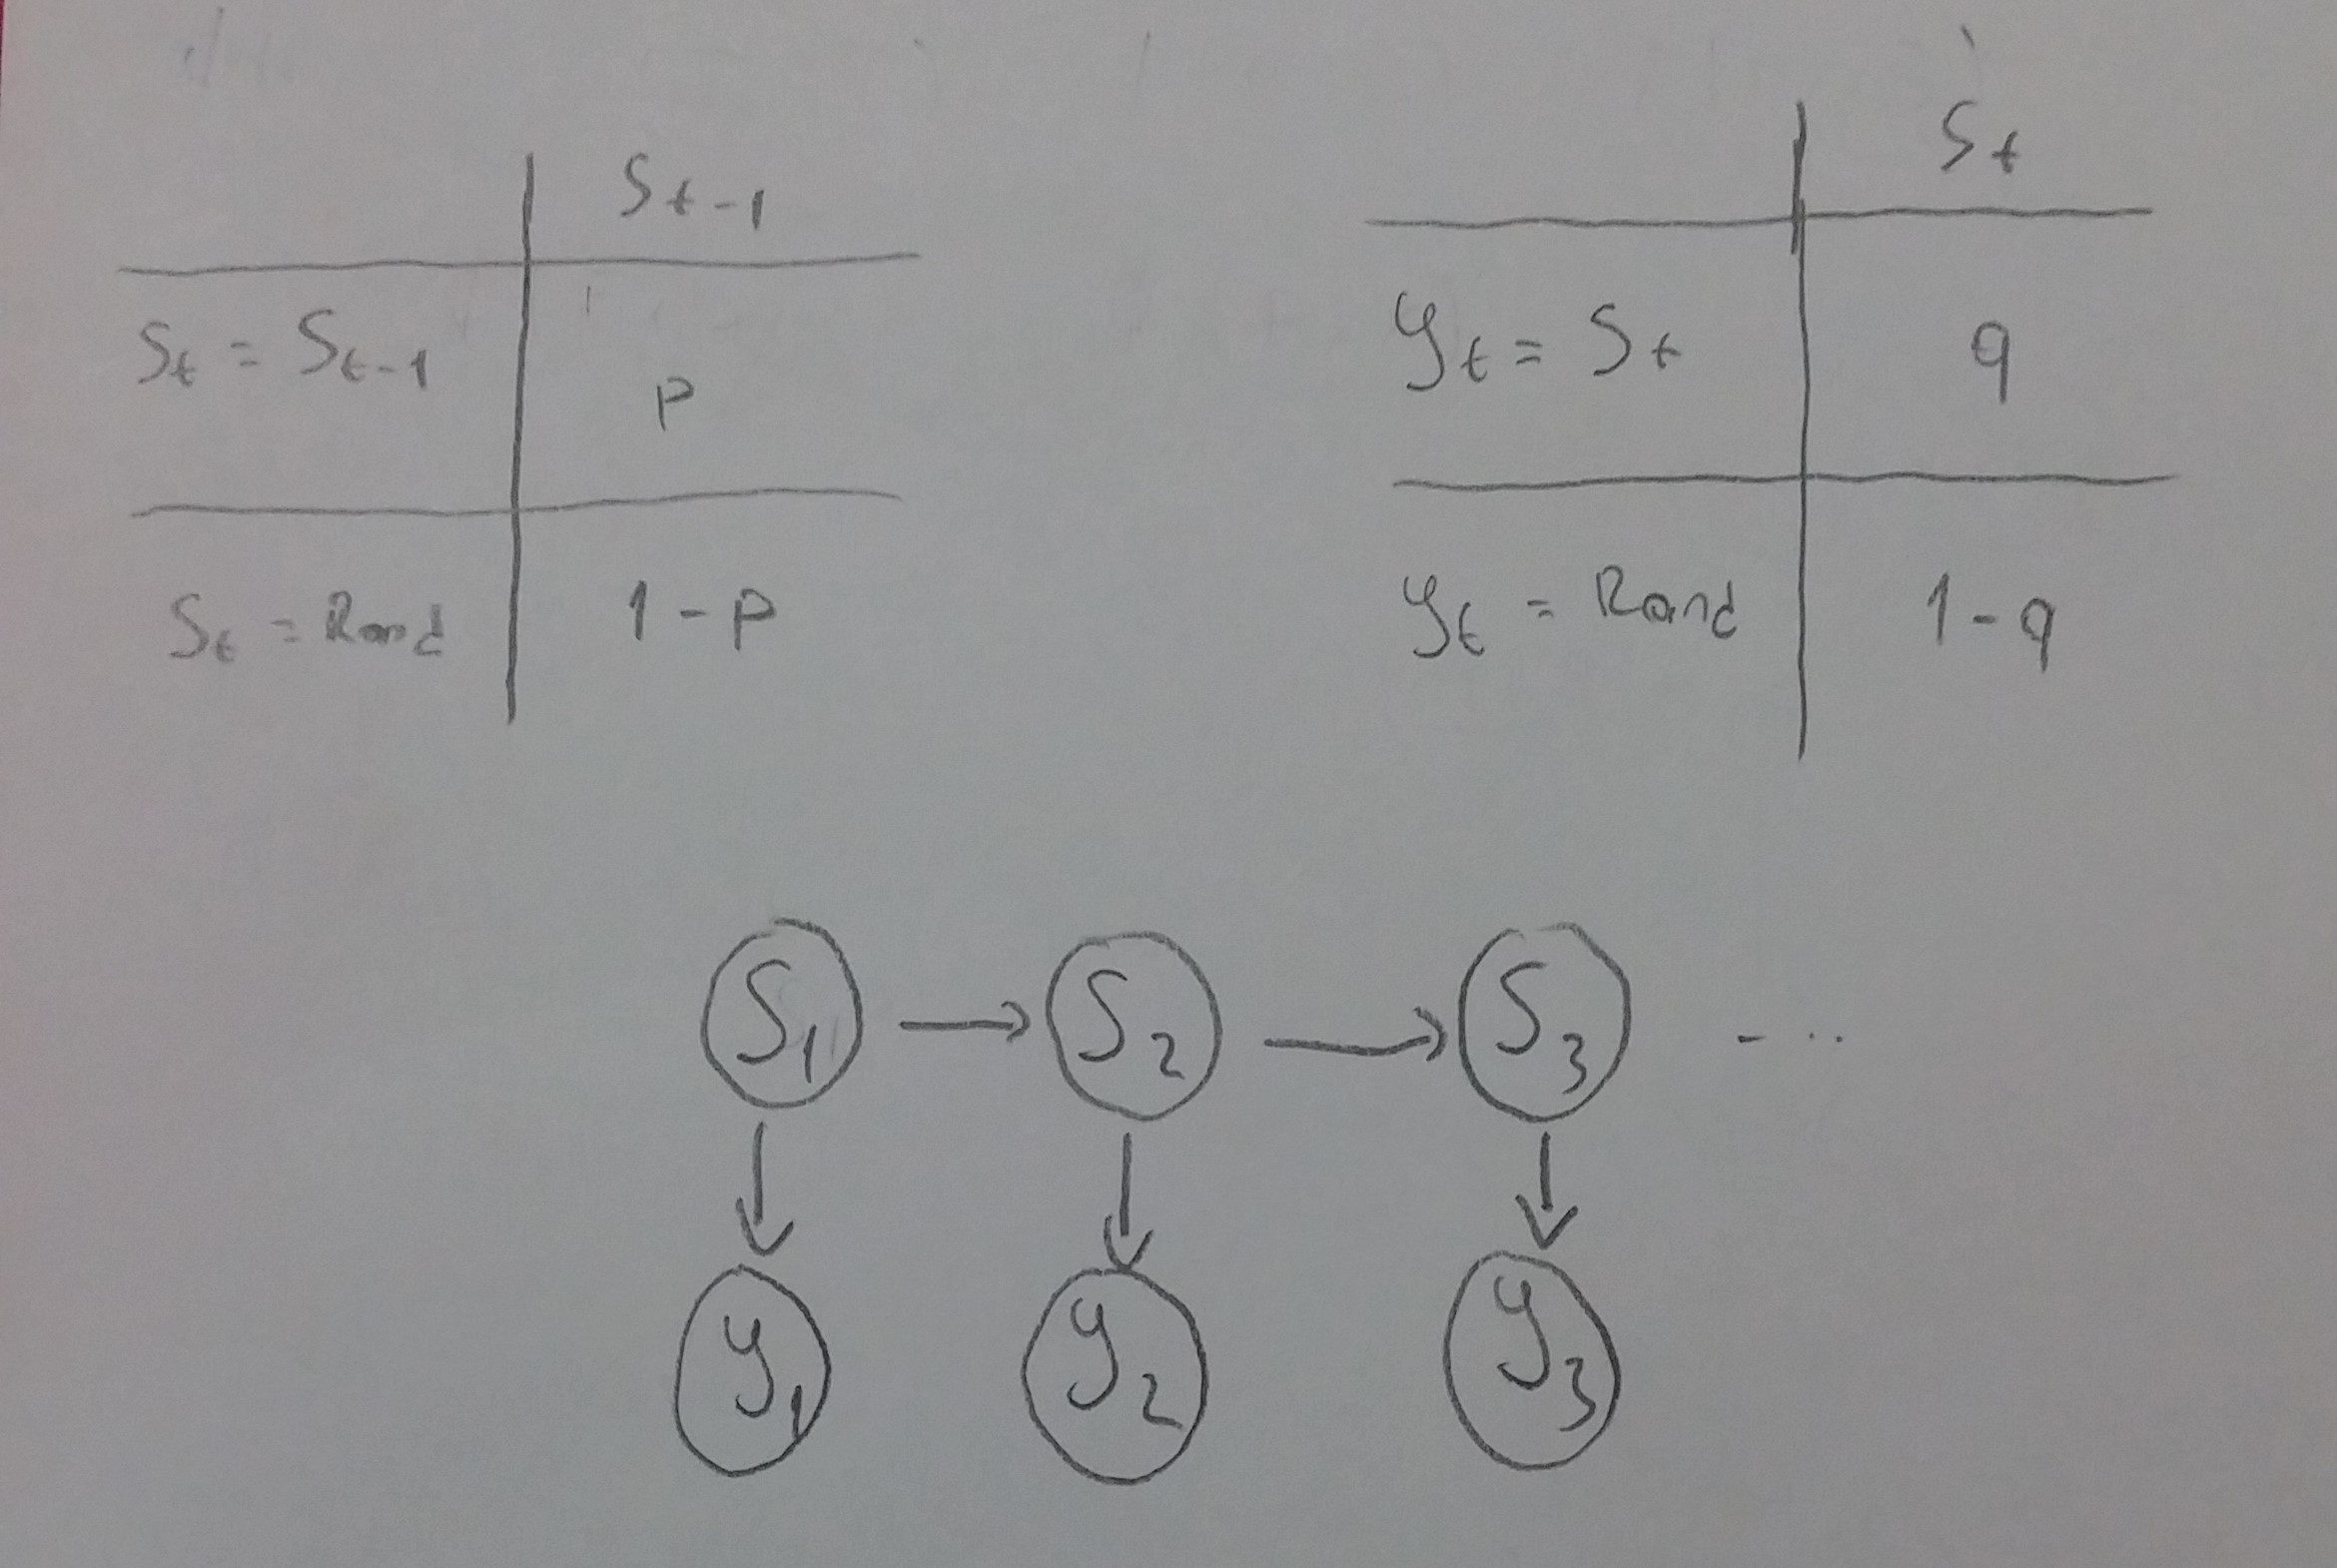

In [155]:
from IPython.display import Image
Image(filename='BookletAnswers\Q16-3.jpg')

### 16.4
We can observe that 'abcde' sequence is repeating or sequence sequence reset to 'a' at any time or when it reaches 'e' it repeats 'e' and also there is some noise.

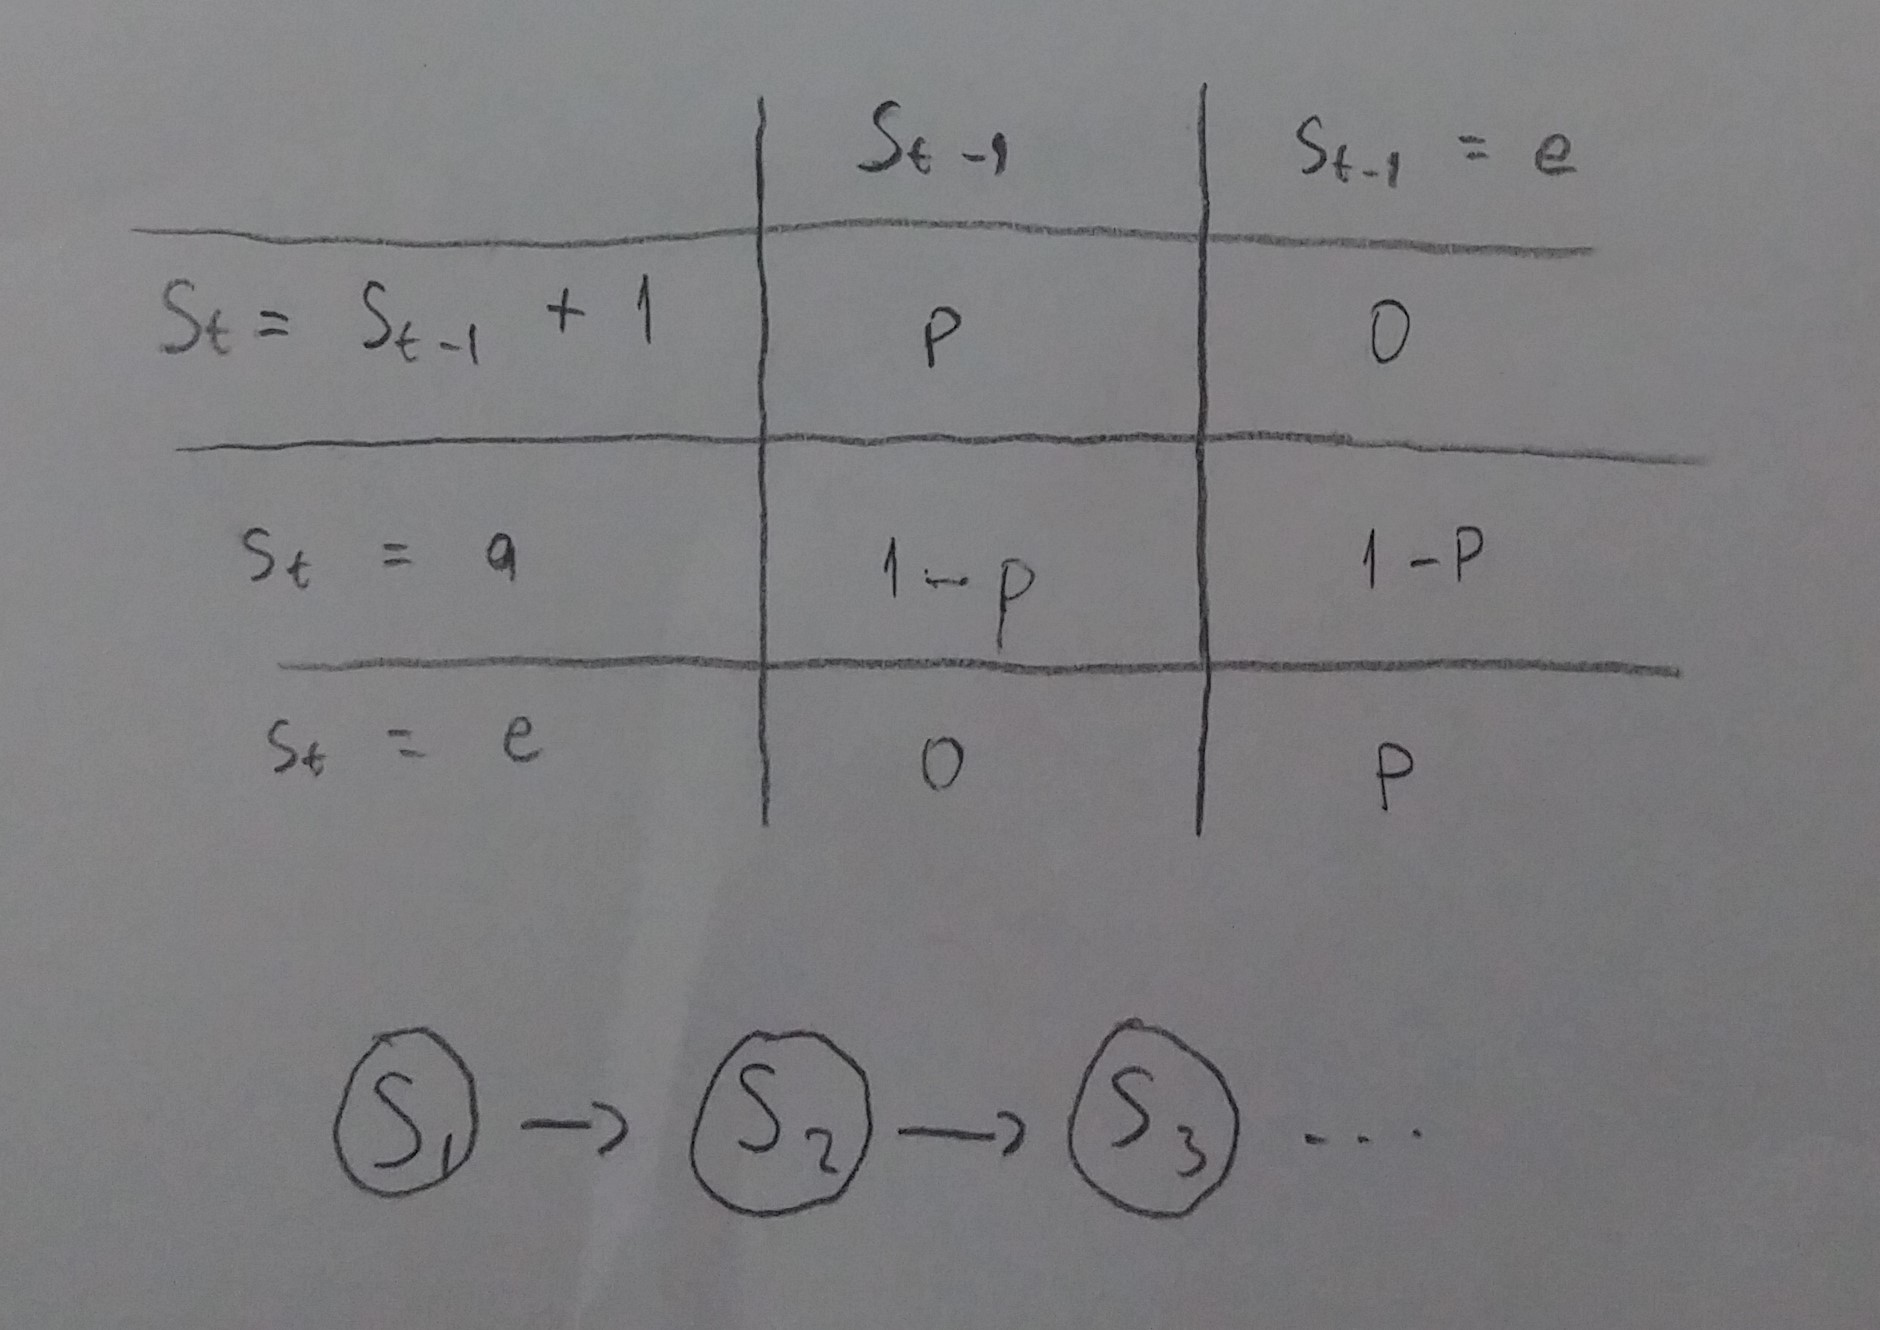

In [156]:
from IPython.display import Image
Image(filename='BookletAnswers\Q16-4.jpg')

### 16.5
1's and 0's repeat 3 or 4 times consecutively. So I think we can model this as Markov(3) or Markov(4). State Diagram is a Markov(3).

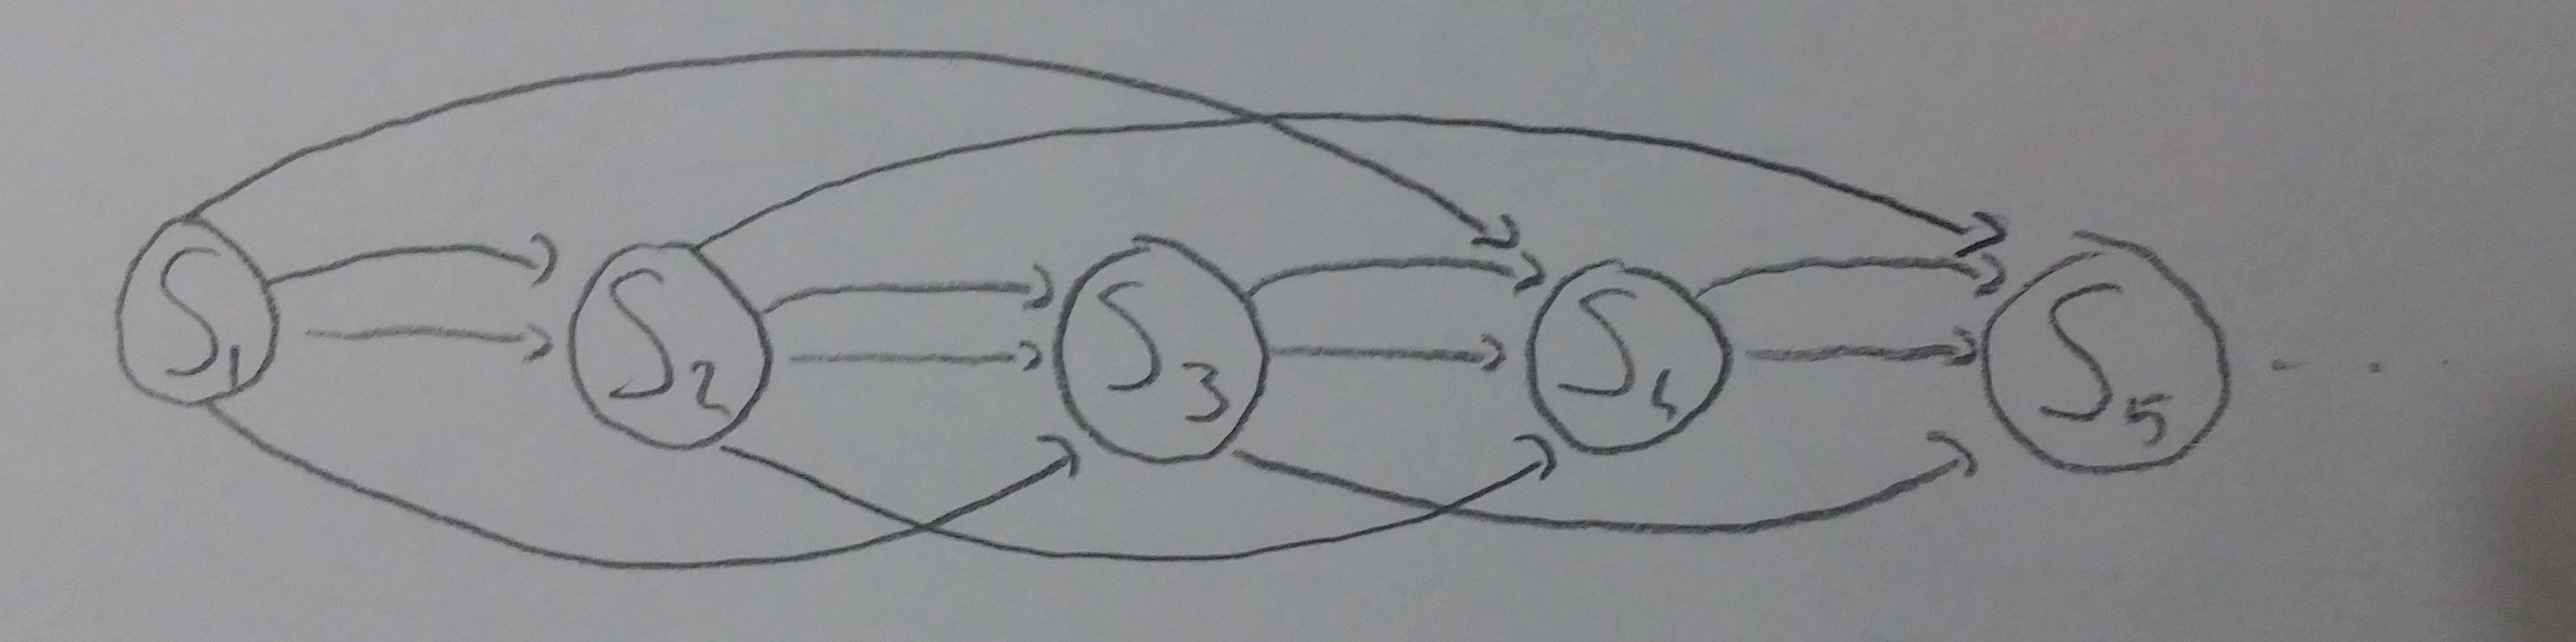

In [157]:
from IPython.display import Image
Image(filename='BookletAnswers\Q16-5.jpg')

### 18.1
Directed Graphical Model

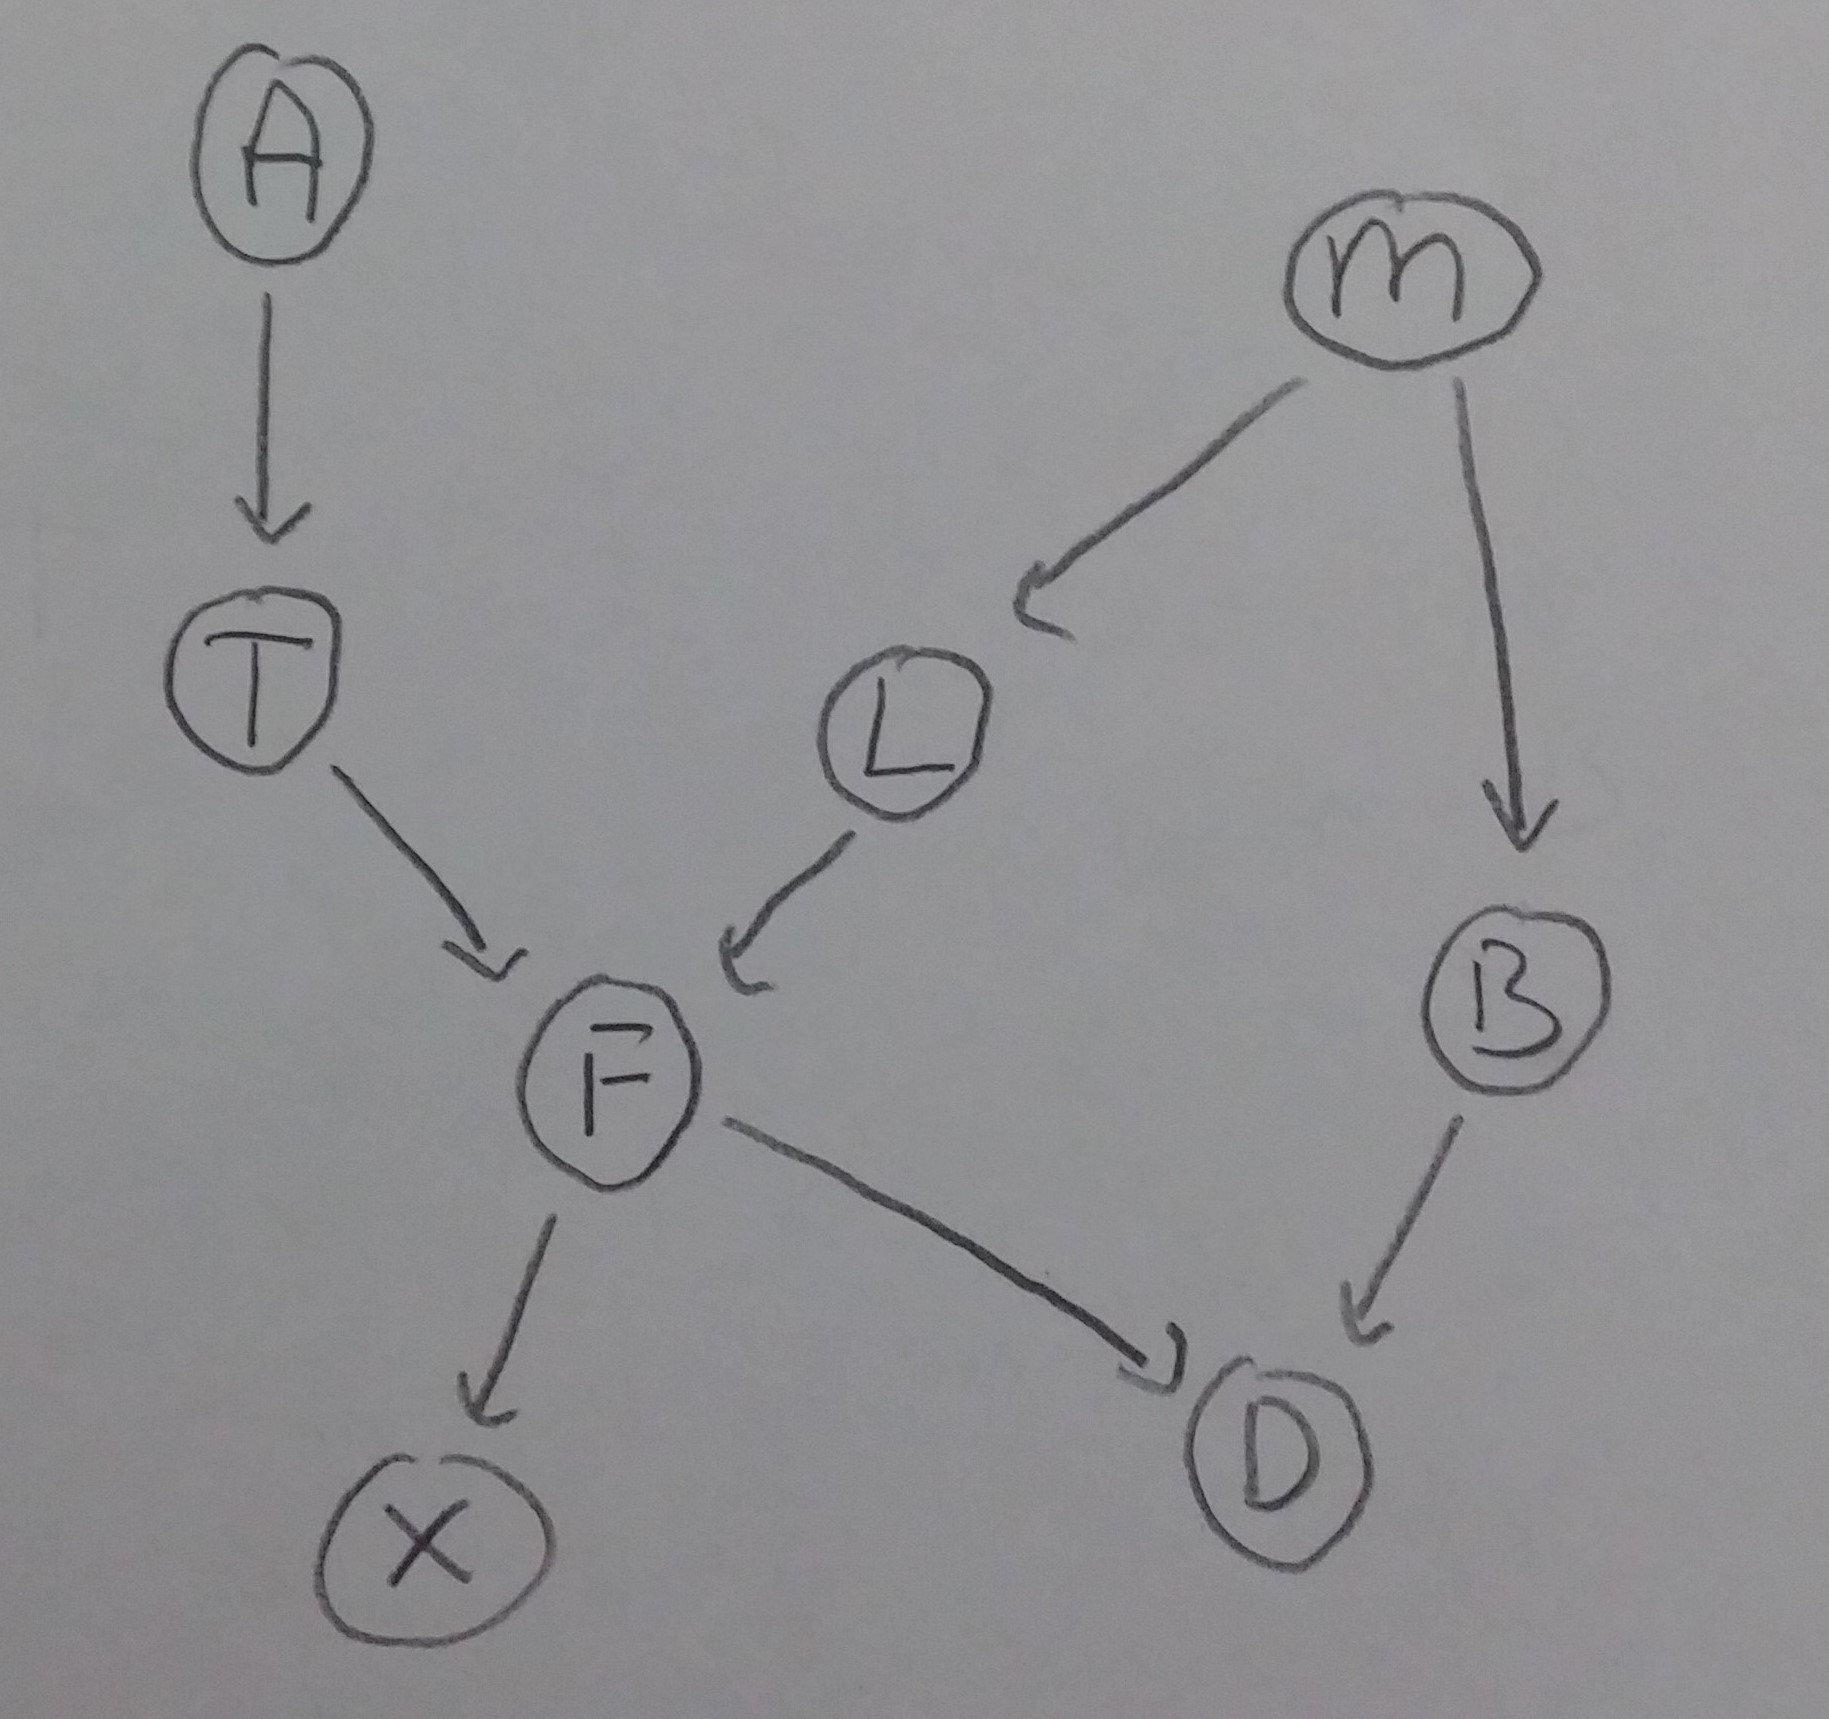

In [158]:
from IPython.display import Image
Image(filename='BookletAnswers\Q18-1.jpg')

### 18.2a
Factor Graph Model

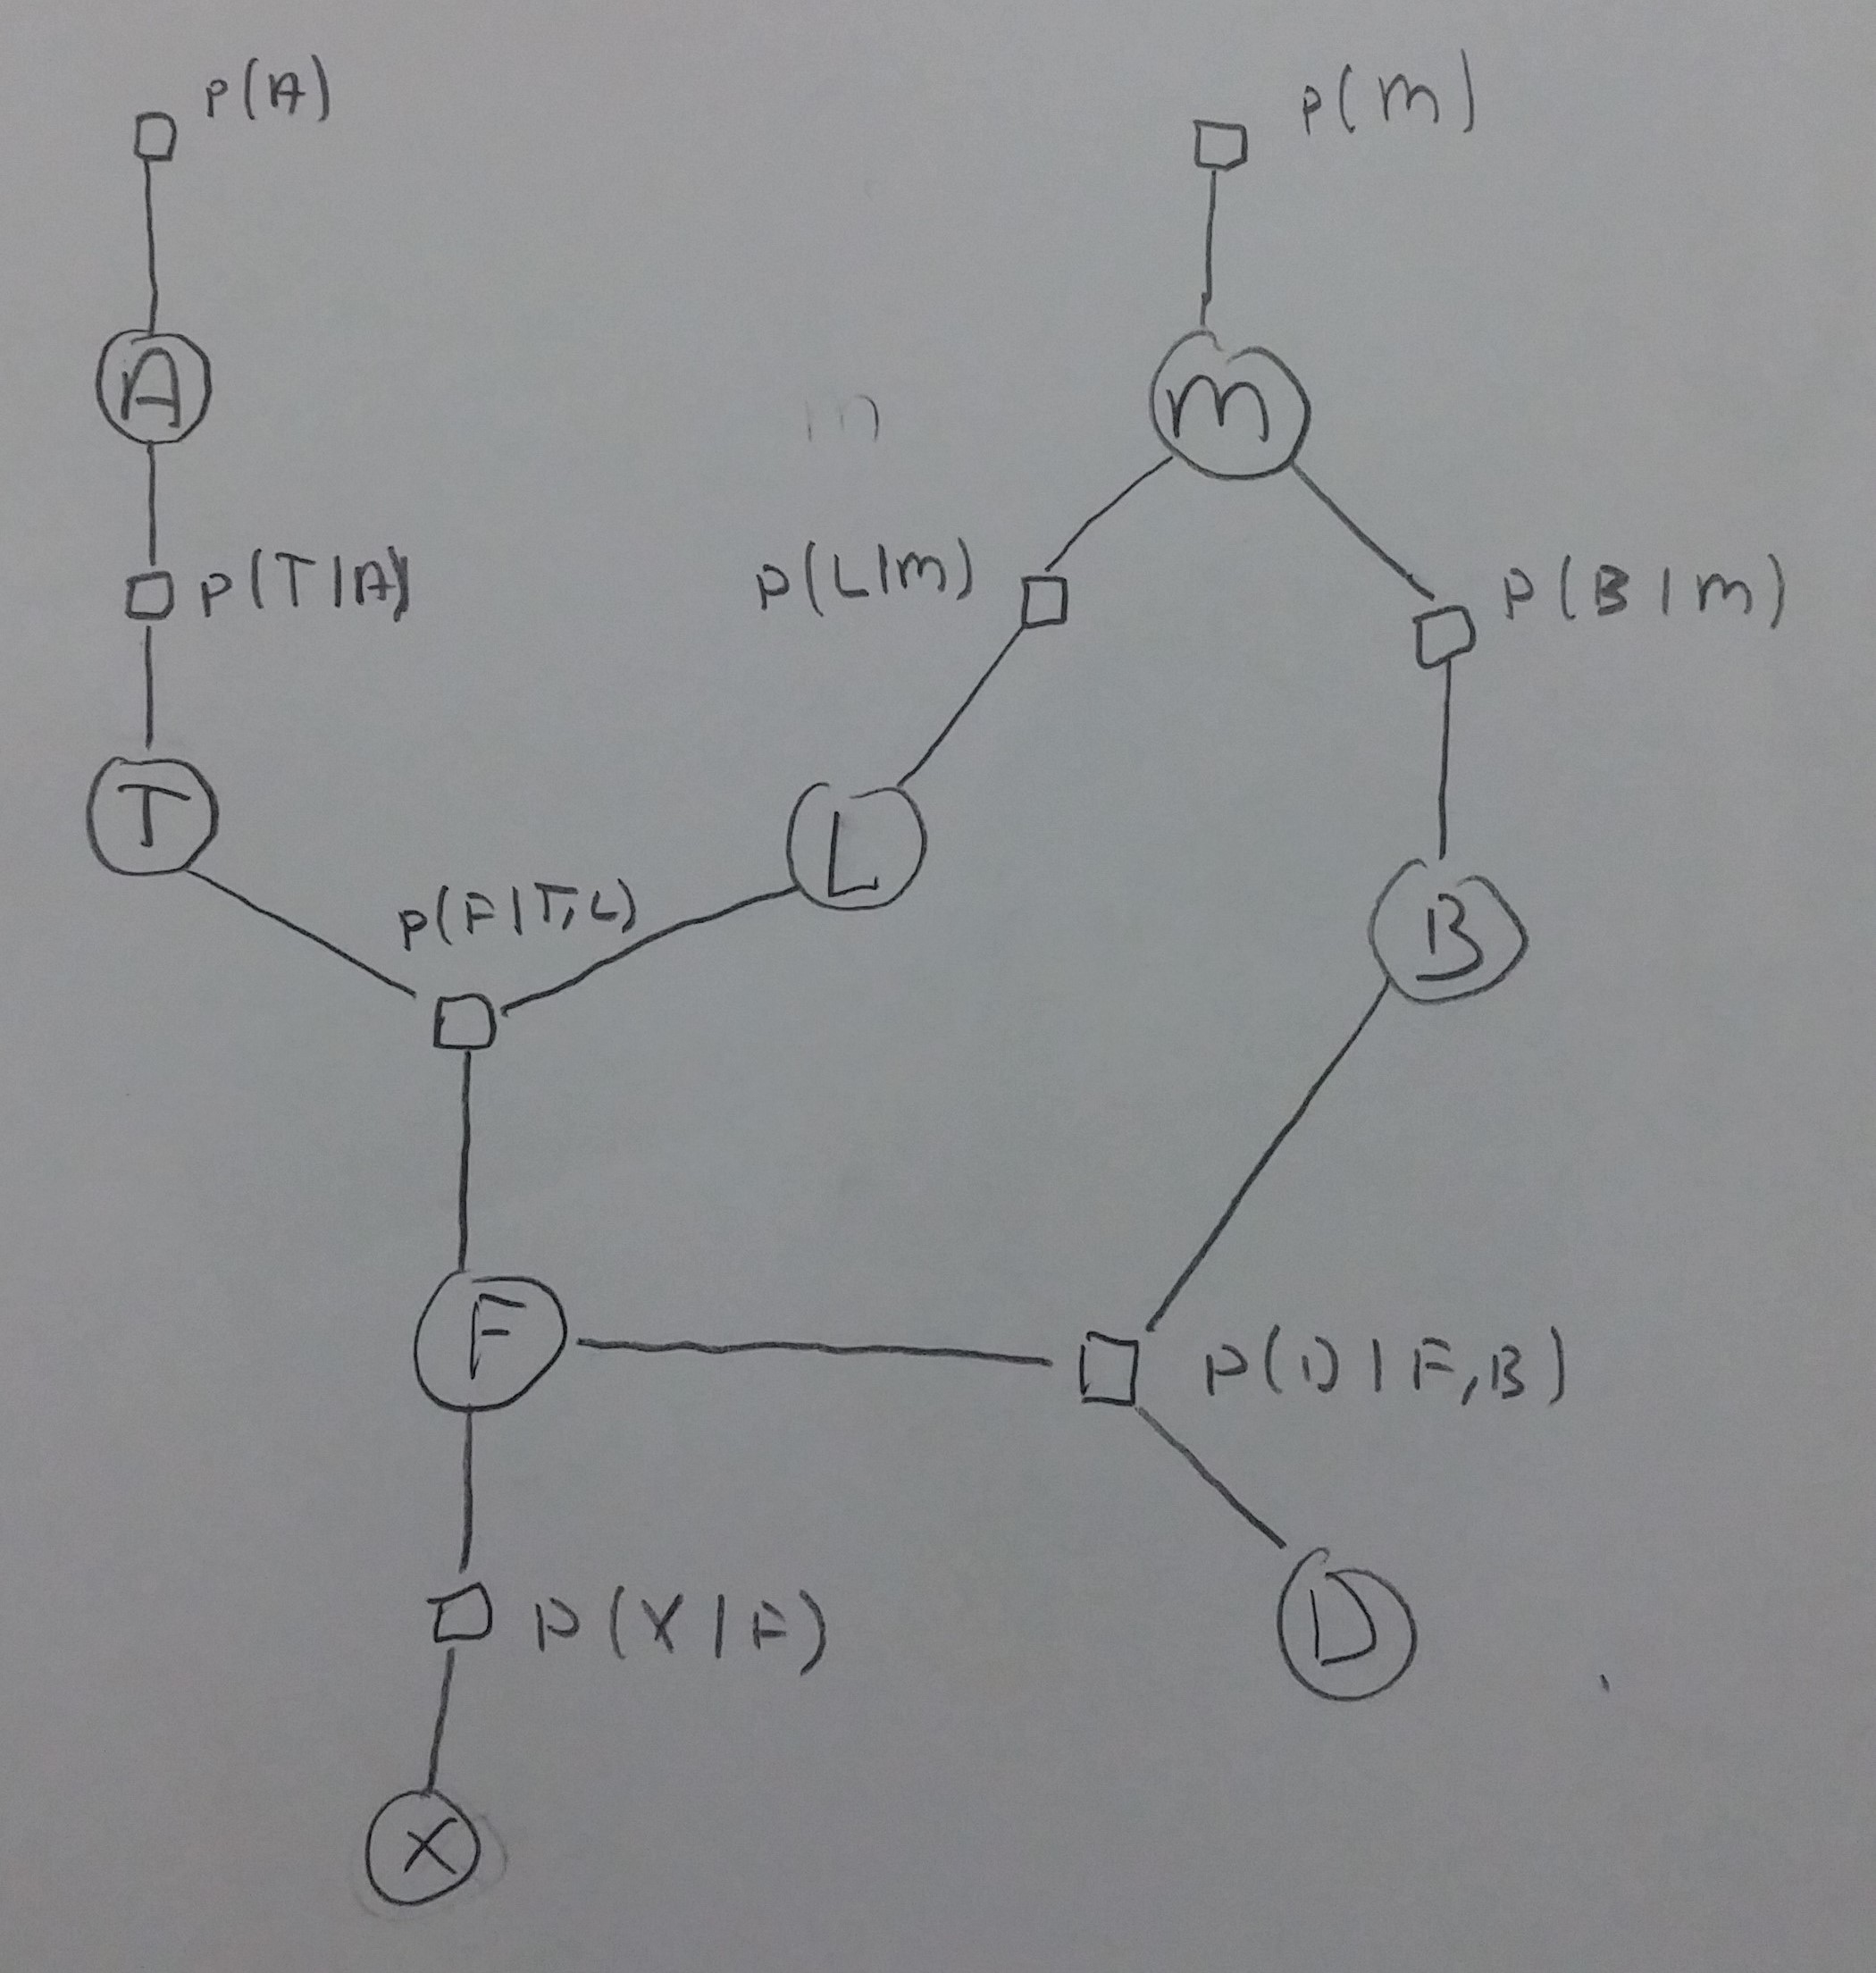

In [159]:
from IPython.display import Image
Image(filename='BookletAnswers\Q18-2a.jpg')

### 18.2b
Undirected Graphical Model

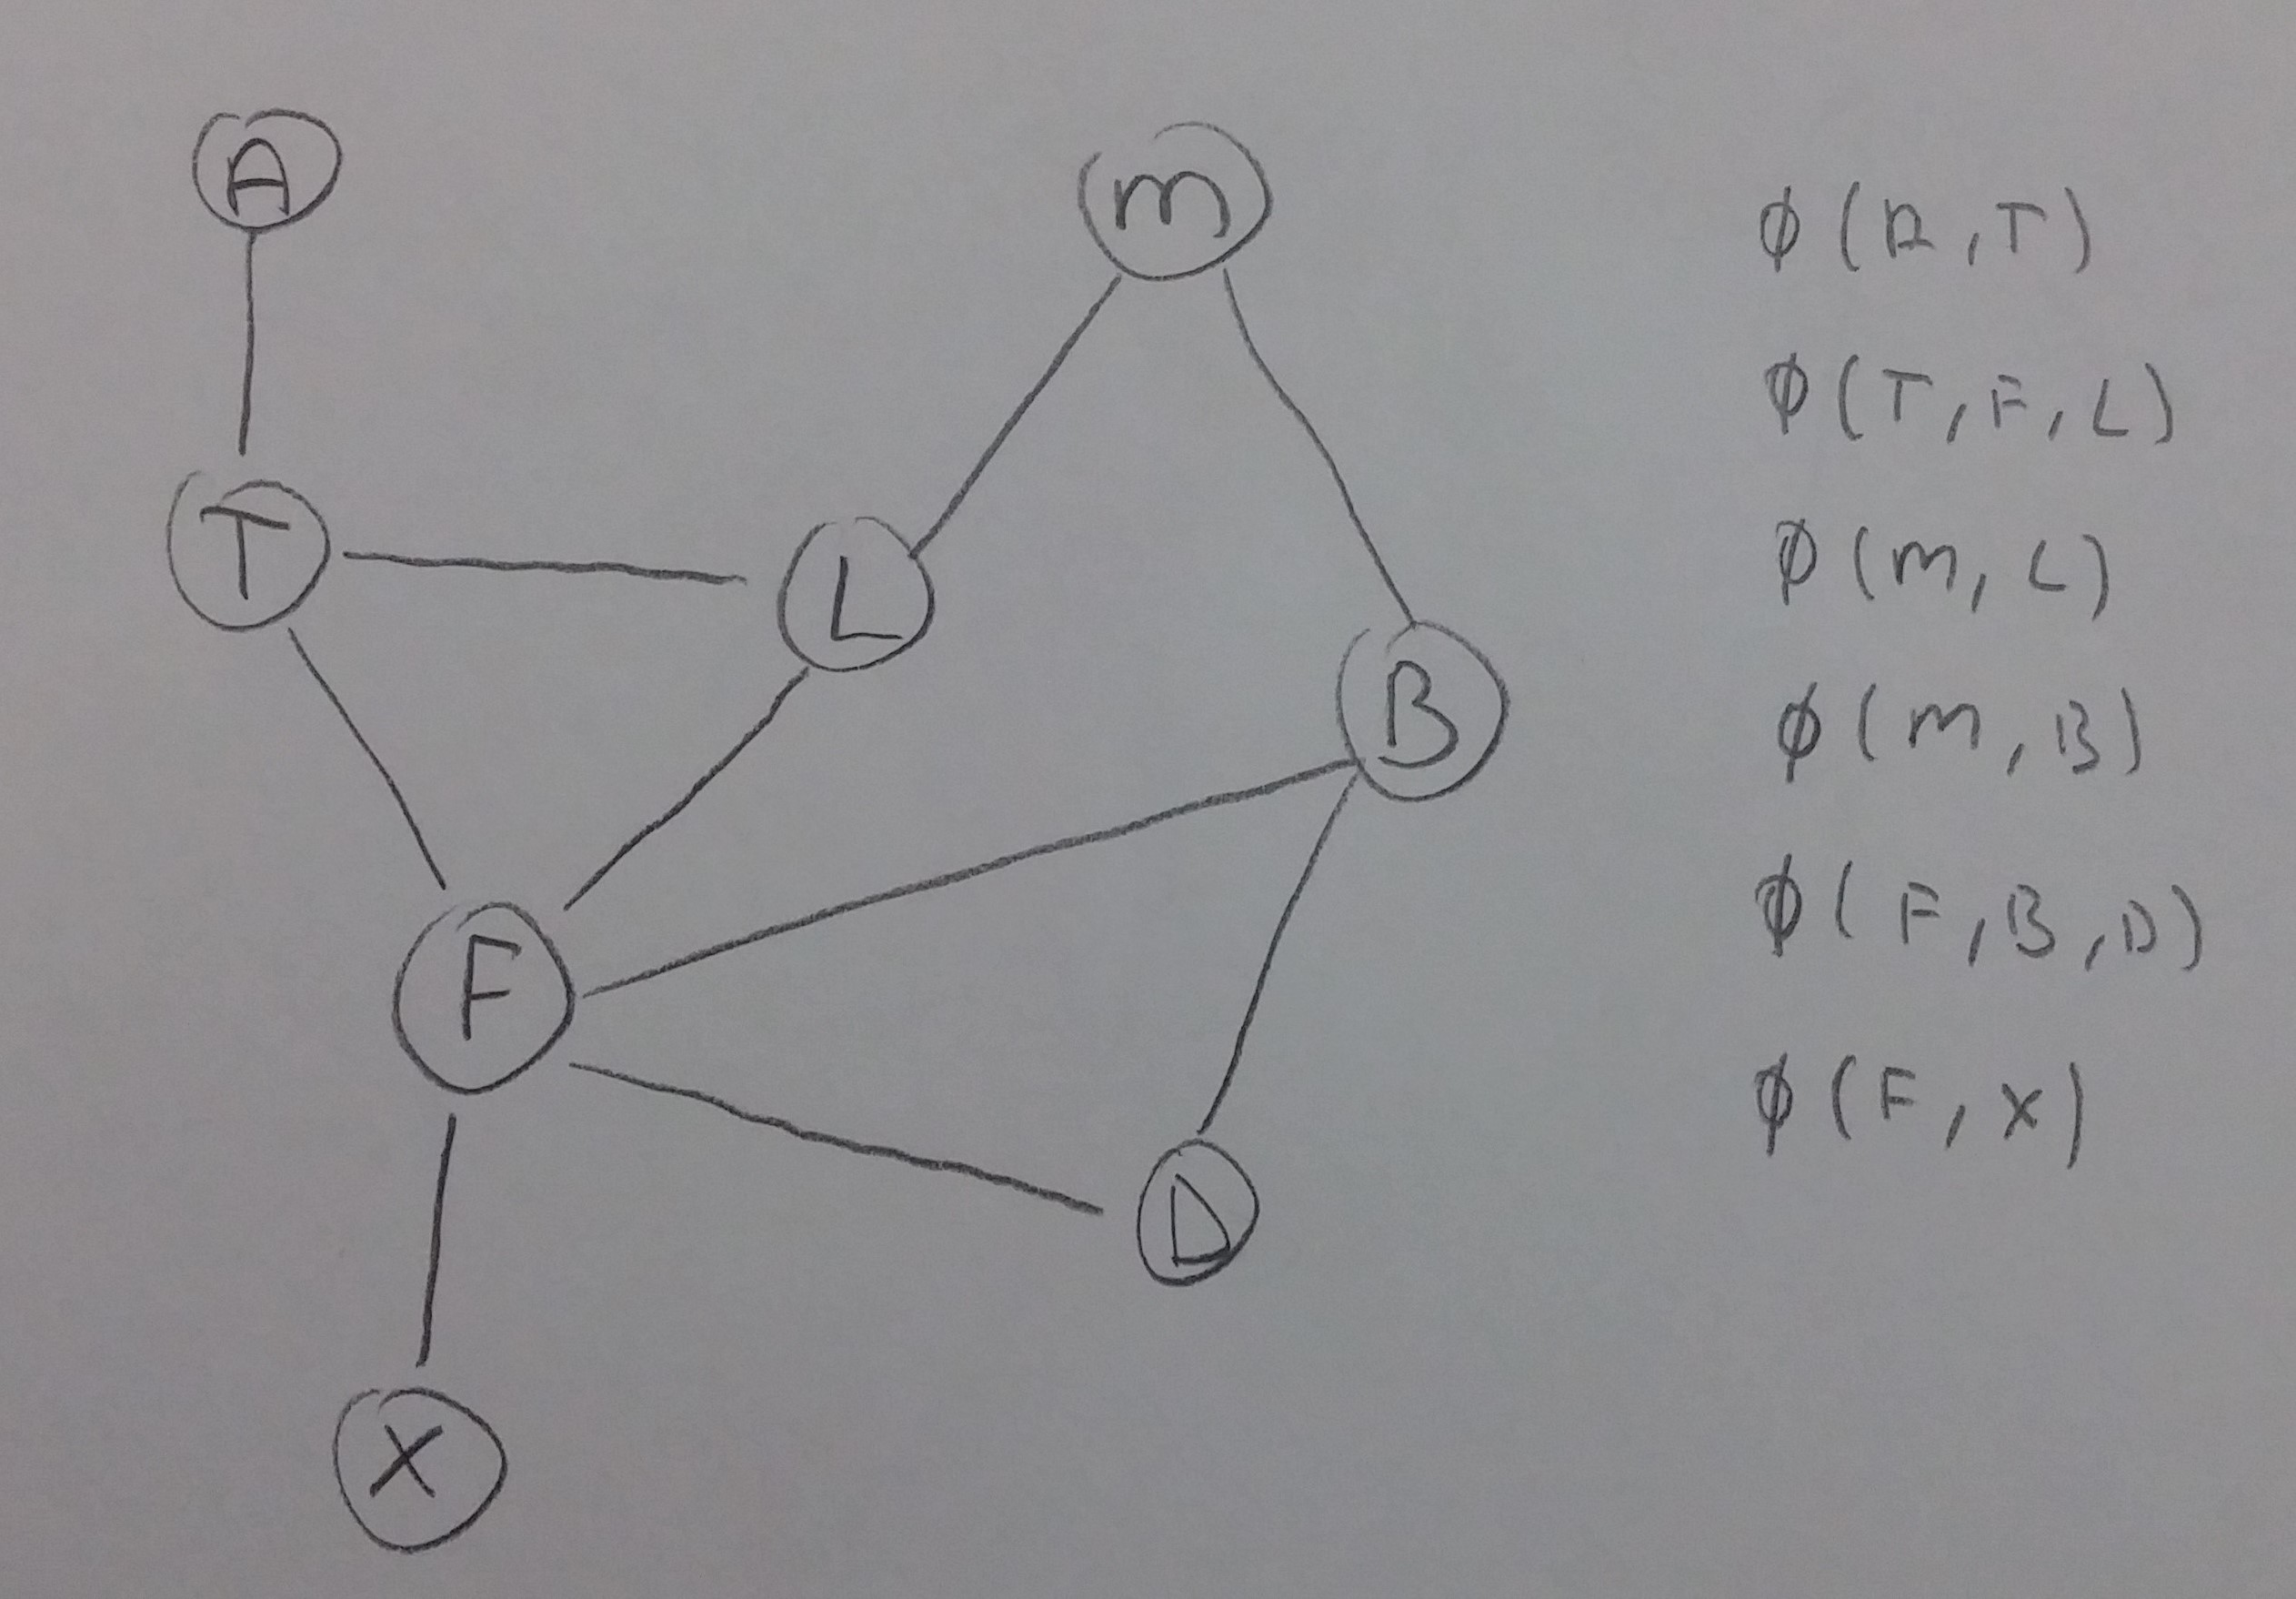

In [160]:
from IPython.display import Image
Image(filename='BookletAnswers\Q18-2b.jpg')

### 18.3
$p(F|T, L) \rightarrow N^2(N-1)$

$p(M) \rightarrow (N-1)$

$p(T|A) \rightarrow N(N-1)$

$p(B|M) \rightarrow N(N-1)$

$p(X|F) \rightarrow N(N-1)$

$p(L|M) \rightarrow N(N-1)$ 

$p(D|F, B) \rightarrow N^2(N-1)$

$p(A) \rightarrow (N-1)$


$Total = 2(N+1)^2(N-1)$ 

### 18.4

#### 18.4a
True. F blocks the path from A to M. (A-T-F-L-M)

#### 18.4b
False. With given X, path from A to M through F (which is parent of X) is now not blocked. (A-T-F-L-M)

#### 18.4c
False. Like in part b, with given X, path from T to L through F (which is parent of X) is now not blocked. (T-F-L)

#### 18.4d
True. With given F, now the path from L to X through F is blocked. (L-F-X)

#### 18.4e
False. The path from L to X is not blocked. Given D is irrelevant from the path. (L-F-X)

## Pr?gr?mm?ng?H?m?w?rk 3

In this exercise we model a string of text using a Markov(1) model. For simplicity we only consider letters 'a-z'. Capital letters 'A-Z' are mapped to the corresponding ones. All remaining letters, symbols, numbers, including spaces, are denoted by '.'.


We have a probability table $T$ where $T_{i,j} = p(x_t = j | x_{t-1} = i)$  transition model of letters in English text for $t=1,2 \dots N$. Assume that the initial letter in a string is always a space denoted as $x_0 = \text{'.'}$. Such a model where the probability table is always the same is sometimes called a stationary model.

1. For a given $N$, write a program to sample random strings with letters $x_1, x_2, \dots, x_N$ from $p(x_{1:N}|x_0)$
1. Now suppose you are given strings with missing letters, where each missing letter is denoted by a question mark (or underscore, as below). Implement a method, that samples missing letters conditioned on observed ones, i.e., samples from $p(x_{-\alpha}|x_{\alpha})$ where $\alpha$ denotes indices of observed letters. For example, if the input is 't??.', we have $N=4$ and
$x_1 = \text{'t'}$ and $x_4 = \text{'.'}$, $\alpha=\{1,4\}$ and $-\alpha=\{2,3\}$. Your program may possibly generate the strings 'the.', 'twi.', 'tee.', etc. Hint: make sure to make use all data given and sample from the correct distribution. Implement the method and print the results for the test strings below. 
1. Describe a method for filling in the gaps by estimating the most likely letter for each position. Hint: you need to compute
$$
x_{-\alpha}^* = \arg\max_{x_{-\alpha}} p(x_{-\alpha}|x_{\alpha})
$$
Implement the method and print the results for the following test strings along with the log-probability  $\log p(x_{-\alpha}^*,x_{\alpha})$.
1. Discuss how you can improve the model to get better estimations.

In [73]:
test_strings = ['th__br__n.f_x.', '_u_st__n_.to_be._nsw_r__','i__at_._a_h_n_._e_r_i_g','q___t.___z._____t.__.___.__.']

Hint: The code below loads a table of transition probabilities for English text.

In [134]:
import csv
from IPython.display import display, Latex

alphabet = [chr(i+ord('a')) for i in range(26)]
alphabet.append('.')
letter2idx = {c:i for i,c in enumerate(alphabet)}

T = []
with open('transitions.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        T.append(row)

print('Example')
## p(x_t = 'u' | x_{t-1} = 'q')
display(Latex(r"$p(x_t = \text{'u'} | x_{t-1} = \text{'q'})$"))
print(T[letter2idx['q']][letter2idx['u']])
display(Latex(r"$p(x_t | x_{t-1} = \text{'a'})$"))
for c,p in zip(alphabet,T[letter2idx['a']]):
    print(c,p)

Example


<IPython.core.display.Latex object>

0.9949749


<IPython.core.display.Latex object>

a 0.0002835
b 0.0228302
c 0.0369041
d 0.0426290
e 0.0012216
f 0.0075739
g 0.0171385
h 0.0014659
i 0.0372661
j 0.0002353
k 0.0110124
l 0.0778259
m 0.0260757
n 0.2145354
o 0.0005459
p 0.0195213
q 0.0001749
r 0.1104770
s 0.0934290
t 0.1317960
u 0.0098029
v 0.0306574
w 0.0088799
x 0.0009562
y 0.0233701
z 0.0018701
. 0.0715219


### Part 1

* Converted the string list into a float list and normalized to have a smoother distribution
* Then used each distribution as a parameter to np.random.choice() function to choose a letter.

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import math

Tf = []

for t in T:
    tf = [float(i) for i in t]
    sm = sum(tf)
    tff = [i/sm for i in tf]
    Tf.append(tff)

In [142]:
def fun(N):
    text = "."
    for i in range(N):
        chrc = np.random.choice(alphabet, 1, p=Tf[letter2idx[text[i]]])
        text = text + chrc[0]
    print(text[1:len(text)])

In [143]:
fun(100)

ioowoubonsele.minchedacherast.whene.anin.f.ordereromaincant.t.ch.on.walsuntaunthe..bst.anghato.come.


### Part 2

In [144]:
trials = 8

for test_string in test_strings:
    print("Original: " + test_string)
    print()
    for i in range(trials):
        text = ''
        for j in range(len(test_string)):
            if(j == 0 and (test_string[j] == '_' or test_string[j] == '?')):
                chrc = np.random.choice(alphabet, 1, p=Tf[letter2idx['.']])
                text = text + chrc[0] 
            elif(test_string[j] != '_' and test_string[j] != '?'):
                text = text + test_string[j]
            else:
                chrc = np.random.choice(alphabet, 1, p=Tf[letter2idx[text[j-1]]])
                text = text + chrc[0] 
                
        print("Sample" + str(i+1) + ":  " + text)
        print()
    print()

Original: th__br__n.f_x.

Sample1:  thesbrten.f.x.

Sample2:  therbremn.fox.

Sample3:  thilbreyn.fox.

Sample4:  thadbre.n.fex.

Sample5:  thenbr.fn.ffx.

Sample6:  the.bracn.f.x.

Sample7:  thesbreln.fex.

Sample8:  therbry.n.fex.


Original: _u_st__n_.to_be._nsw_r__

Sample1:  bulstarnt.to.be.wnswhrco

Sample2:  aunsth.ne.tonbe.mnsw.rve

Sample3:  lurstheno.to.be.answory.

Sample4:  huast.ons.tonbe.unsworou

Sample5:  hulsth.nd.totbe.tnswhrth

Sample6:  nupsthan..toobe.unswhr.i

Sample7:  aursthana.torbe.lnsworgh

Sample8:  ounsteeng.toobe.mnsworer


Original: i__at_._a_h_n_._e_r_i_g

Sample1:  iriatt..anhena.he.riirg

Sample2:  it.ath.ta.hent.werreiog

Sample3:  imeato.wathane.heeriing

Sample4:  inyata.fashen..tehrtirg

Sample5:  in.ath.saihenv.ee.rnilg

Sample6:  irnath.karhene.ie.rei.g

Sample7:  ineat..aanhen..iedrsitg

Sample8:  ileat..oashen..te.ruieg


Original: q___t.___z._____t.__.___.__.

Sample1:  quist.or.z.ne.bet..t.mp..al.

Sample2:  qur.t.im.z.bellyt.an.it..it.

Samp

### Part 3

* Because this is a Markov(1) model we just need to build the words from the begining by taking the most probable letter one by one by looking its previous letter's Markov(1) letter distribution.
* Side note: I calcualted every joint probability for $\log p(x_{-\alpha}^*,x_{\alpha})$. But I think I don't exactly know how to calculate the log probability. At each iteration prb list holds the joint probabilities. To find log-probability, I multiplied those probabilities and then took log of them.

In [154]:
for test_string in test_strings:
    prb = []
    print("Original: " + test_string)
    print()
    text = ''
    for j in range(len(test_string)):
        summ = 0
        if(j == 0 and (test_string[j] == '_' or test_string[j] == '?')):
            chrc = alphabet[np.argmax(Tf[letter2idx['.']])]
            text = text + chrc
            for tf in Tf:
                summ = summ + tf[letter2idx['.']]                
            prb.append(summ* Tf[letter2idx['.']][letter2idx[chrc]])
        elif(test_string[j] != '_' and test_string[j] != '?'):
            text = text + test_string[j]
        else:
            chrc = alphabet[np.argmax(Tf[letter2idx[text[j-1]]])]
            text = text + chrc
            for tf in Tf:
                summ = summ + tf[letter2idx[text[j-1]]]
            prb.append(summ* Tf[letter2idx['.']][letter2idx[chrc]])
            
    print("BestFit:  " + text)
    mpy = 1
    for i in prb:
        mpy = mpy * i
    print("log-probability: " + str(math.log(mpy)))
    print()
    print()
    
   

Original: th__br__n.f_x.

BestFit:  the.bre.n.f.x.
log-probability: -14.484936467679942


Original: _u_st__n_.to_be._nsw_r__

BestFit:  tursthen..tonbe.tnswhre.
log-probability: -25.87153701236817


Original: i__at_._a_h_n_._e_r_i_g

BestFit:  in.ath.tanhen..te.reing
log-probability: -27.103898703727463


Original: q___t.___z._____t.__.___.__.

BestFit:  quret.thez.the.tt.th.the.th.
log-probability: -43.316453184443915




### Part 4
As an improvment we may use a higher order Markov rather than Markov(1). With using a higher order we can observe more complex structers in the words. So we can find better results. However using a higher order Markov's cost is adding up exponentially. So we should find a balance between precision and efficiency.